#Данные
#Test
https://www.kaggle.com/code/sanjaybhatt/difference-between-pca-and-tsne-beginner-level/data

https://drive.google.com/file/d/1O5NT1d3PYZJxQSxx8l2rtnf9BZxrudvh/view?usp=sharing

#Train
https://www.kaggle.com/code/sanjaybhatt/difference-between-pca-and-tsne-beginner-level/data?select=mnist_train.csv

https://drive.google.com/file/d/14vnb8i0xoeCfEYdngkz7GmuRcJQDKLiU/view?usp=sharing

In [2]:
! gdown --id 1O5NT1d3PYZJxQSxx8l2rtnf9BZxrudvh

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1O5NT1d3PYZJxQSxx8l2rtnf9BZxrudvh
To: /content/mnist_test.csv.zip
100% 2.28M/2.28M [00:00<00:00, 156MB/s]


In [3]:
! unzip /content/mnist_test.csv.zip

Archive:  /content/mnist_test.csv.zip
  inflating: mnist_test.csv          


In [4]:
! gdown --id 14vnb8i0xoeCfEYdngkz7GmuRcJQDKLiU

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14vnb8i0xoeCfEYdngkz7GmuRcJQDKLiU
To: /content/mnist_train.csv.zip
100% 13.7M/13.7M [00:00<00:00, 33.6MB/s]


In [6]:
! unzip /content/mnist_train.csv.zip

Archive:  /content/mnist_train.csv.zip
  inflating: mnist_train.csv         


In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('mnist_train.csv')

In [10]:
df.head(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.shape

(60000, 785)

Сохраняем label и удаляем его из тренировочного датафрейма, так как это таргет переменная

In [12]:
label = df['label']

In [13]:
df = df.drop(['label'] , axis = 1)

Обрабатываем 15000 записей, чтобы алгоритмы быстрее работали

In [28]:
x = df.head(15000)
y = label.head(15000)

Применяем StandartScaler 

**зачем?**

In [19]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler().fit_transform(x)
std_x.shape

(15000, 784)

In [20]:
type(std_x)

numpy.ndarray

# Импорт PCA, обучаем и тд

In [21]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_x = pca.fit_transform(std_x)

In [30]:
pca_df = np.vstack((pca_x.T , y))
pca_df = pd.DataFrame(pca_df.T , columns=['axis_1' , 'axis_2' , 'label'])

In [31]:
pca_df.head(3)

,axis_1,axis_2,label
0,-0.960725,-4.457027,5.0
1,8.658156,-7.397570,0.0
2,2.082838,9.640219,4.0


In [33]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

# Визуализация того, как раскидал данные PCA (просто куча, ничего непонятно, но очень красиво)

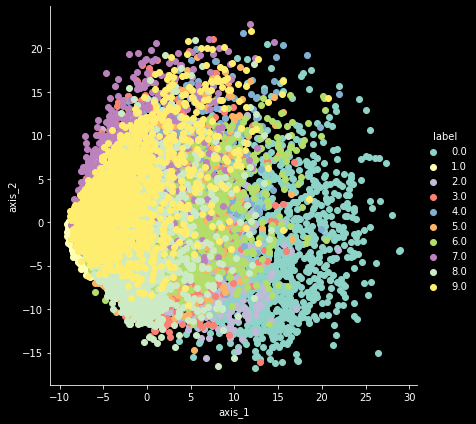

In [44]:
ax = sns.FacetGrid(pca_df , hue='label' , height=6)
ax.map(plt.scatter, 'axis_1' , 'axis_2').add_legend()

# TSNE

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2 , random_state=0)
tsne_x = tsne.fit_transform(std_x)
tsne_data = np.vstack((tsne_x.T , y))
tsne_df = pd.DataFrame(tsne_data.T , columns=['axis_1' , 'axis_2' , 'label'])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


# Визуализация того, как раскидал TSNE (хорошо видны области для каждого label, можно понять, что при axis_1 = X , axis_2 = y, мы получаем label = L, т.е. такая видуализация повышает интерпритируемость и тд.

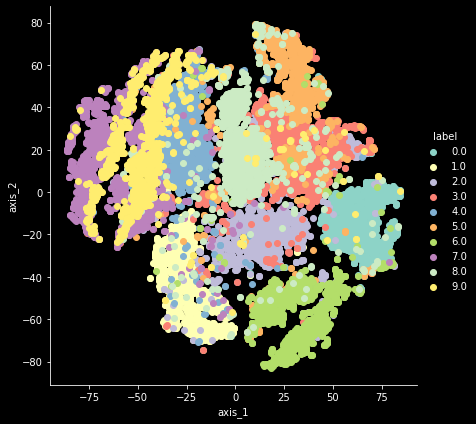

In [43]:
bx = sns.FacetGrid(tsne_df , hue='label' , height=6)
bx.map(plt.scatter, 'axis_1' , 'axis_2').add_legend()

# Идеей статьи я вижу сравнение PCA , T-SNE, UMAP, LDA. Понять плюсы и минусы алгоритмов, возможно, немного углубиться в работу кажого (с точки зрения математики). Уже сейчас я могу сказать, что PCA отработал за 1 секунду, T-SNE отрабатывал 2 минуты 50 секунд. Также слышал, что LDA не искажает исходные данные и тд. Материал в общем найти можно, тема не прям чтобы раскрыта. Данные можно взять юфушные. 
